Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense,Rescaling,Activation,BatchNormalization,Dropout,RandomFlip,RandomRotation
from tensorflow.keras.regularizers import l2

In [7]:
import os

# List uploaded files
uploaded_files = os.listdir('/content/drive/MyDrive')
print(uploaded_files)

# Verify the file extension
zip_file_path = '/content/drive/MyDrive/CNN_assignment.zip'  # Ensure this matches the uploaded file name
print(f"Checking file: {zip_file_path}")

# Check if the file is a valid ZIP file
import zipfile

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        print(f"File {zip_file_path} is a valid zip file.")
except zipfile.BadZipFile:
    print(f"File {zip_file_path} is not a valid zip file.")

['Colab Notebooks', 'CNN_assignment.zip', 'CNN_assignment', 'AugmentSample']
Checking file: /content/drive/MyDrive/CNN_assignment.zip
File /content/drive/MyDrive/CNN_assignment.zip is a valid zip file.


In [8]:
zip_file_path = '/content/drive/MyDrive/CNN_assignment.zip'  # Adjust the filename if needed
if os.path.exists('/content/drive/MyDrive/CNN_assignment'):
  shutil.rmtree('/content/drive/MyDrive/CNN_assignment')
extracted_folder_path = '/content/drive/MyDrive/CNN_assignment/'  # You can change this to any folder name

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"Folder extracted to: {extracted_folder_path}")


Folder extracted to: /content/drive/MyDrive/CNN_assignment/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path(r"/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [10]:

image_count_train = len(list(data_dir_train.rglob(r"*.jpg")))
print(image_count_train)
image_count_test = len(list(data_dir_test.rglob('*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=0.2,
    subset='training',  # Specify this is for training data
    seed=123
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    subset='validation',  # Specify this is for validation data
    seed=123
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

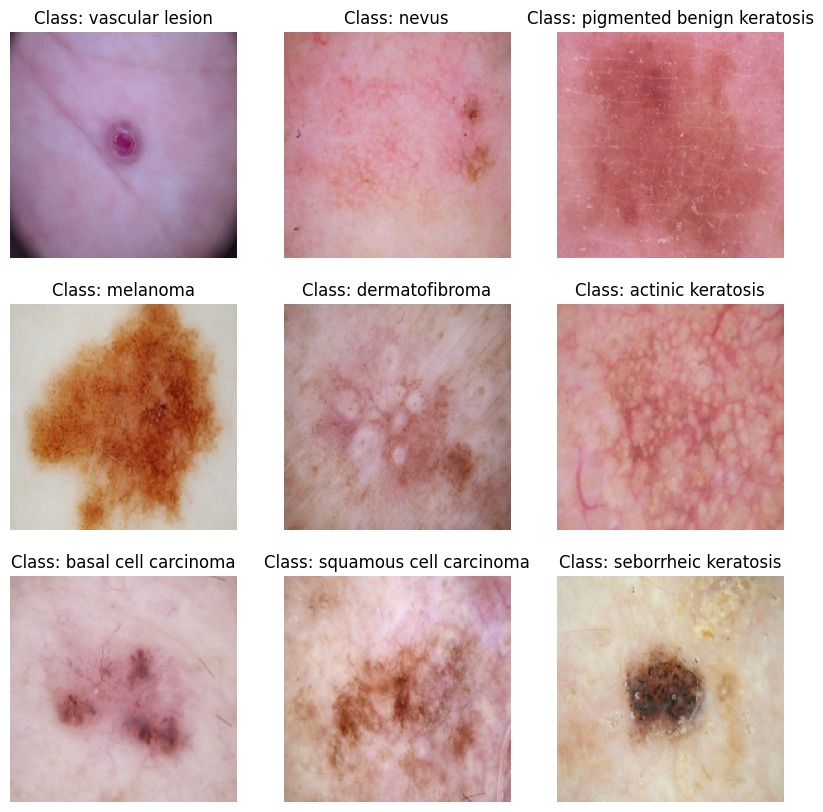

In [15]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
class_images = {}

# Iterate over the dataset to collect one image per class
for images, labels in train_ds:

    for image, label in zip(images, labels):
        class_label = int(label.numpy())# Convert label tensor to integer
        if class_label not in class_images:
            class_images[class_label] = image
        # If all classes have one image, stop iterating
        if len(class_images) == len(train_ds.class_names):
            break
    if len(class_images) == len(train_ds.class_names):
        break

# Create a subplot grid to display one image per class
plt.figure(figsize=(10, 10))

# Loop through the dictionary and display one image for each class
for i, (class_label, image) in enumerate(class_images.items()):
    plt.subplot(3, 3, i + 1)  # 3x3 grid (adjust depending on number of classes)
    plt.imshow(image.numpy().astype("uint8"))  # Convert tensor to numpy array for plotting
    plt.title(f"Class: {train_ds.class_names[class_label]}")  # Use class name for the title
    plt.axis('off')  # Hide axes

plt.show()


In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# Set seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(180, 180, 3))),  # Rescaling in the model

model.add(Conv2D(64, (3,3),input_shape=(180,180,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(16, (3,3),activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(9,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 87, 87, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 41, 41, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 26896)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,721,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,747,257 (6.67 MB)

 Trainable params: 1,747,065 (6.66 MB)

 Non-trainable params: 192 (768.00 B)

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 228ms/step - accuracy: 0.2173 - loss: 4.1485 - val_accuracy: 0.1141 - val_loss: 2.4829
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4217 - loss: 1.8152 - val_accuracy: 0.0089 - val_loss: 2.6057
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4800 - loss: 1.6518 - val_accuracy: 0.0000e+00 - val_loss: 3.2155
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5563 - loss: 1.4515 - val_accuracy: 0.0045 - val_loss: 3.9402
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6180 - loss: 1.2884 - val_accuracy: 0.0872 - val_loss: 4.2124
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6618 - loss: 1.1720 - val_accuracy: 0.2998 - val_loss: 2.8325
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6972 - loss: 1.0266 - val_accuracy: 0.0872 - val_loss: 3.7753
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7542 - loss: 0.8833 - val_accuracy: 0.13

### Visualizing training results

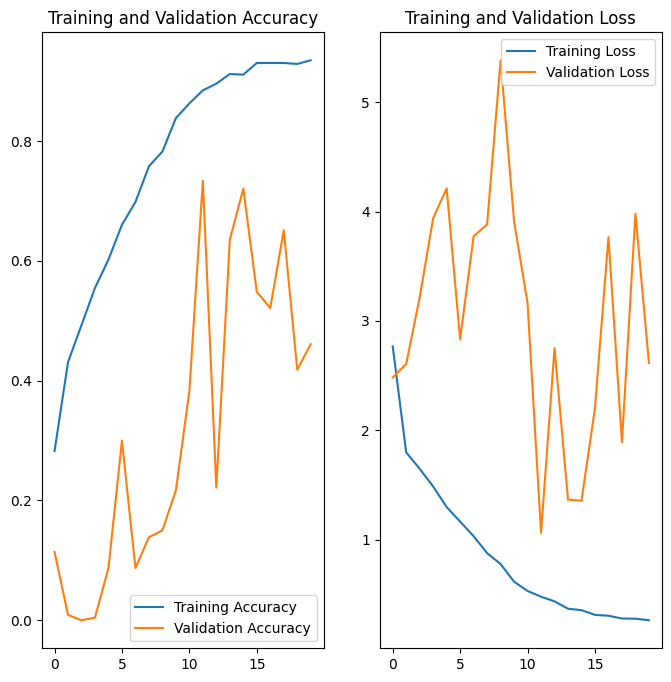

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##### **Observations**
#### **Numbers of Base Model with Batch Normalization,Drop and Regularization Rescaling:**
 - Rescaling
 - Batch Normalization
 - Dropout - 0.15
 - Training Accuracy = 94%, Validation Accuracy = 46%
 - Training Loss = 0.25, Validation Loss = 2.6

**Overall Model looks overfitting, We will try augmentation in below models**

The model seems overfit , since the Train accuracy is 92%, where Val Accuracy is 32%.
- There is huge difference between Train and Val Accuracy. We will try augmenation using Keras in further steps to reduce overfitting

Found 2239 files belonging to 9 classes.
Before Augmentation


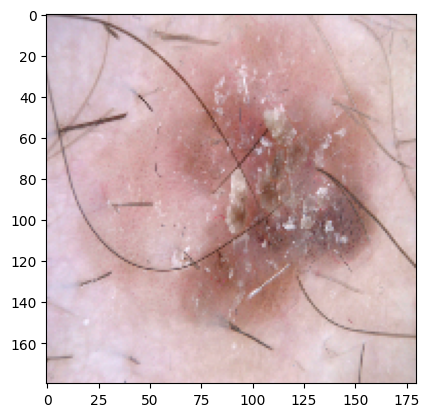

After Augmentation


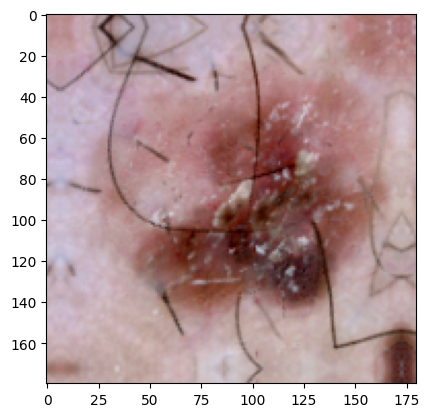

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(180,
                      180,
                      3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.15),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(factor=0.5)
  ]
)

data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",batch_size=1,image_size=(180,180))
image, label = next(iter(data))
print("Before Augmentation")
plt.imshow(image[0].numpy().astype("uint8"))
plt.show()
print("After Augmentation")
result=data_augmentation(image)
plt.imshow(result[0].numpy().astype("uint8"))
plt.show()





### Todo:
### Create the model, compile and train the model


In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model2 = models.Sequential()
model2.add(Rescaling(1./255, input_shape=(180, 180, 3))),  # Rescaling in the model
data_augmentation,
model2.add(Conv2D(64, (3,3),input_shape=(180,180,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.15))

model2.add(Conv2D(32, (3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.15))

model2.add(Conv2D(16, (3,3),activation='relu',kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.15))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(9,activation='softmax'))
## Your code goes here



### Compiling the model

In [26]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [27]:
## Your code goes here, note: train your model for 20 epochs
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    batch_size=batch_size
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.3077 - loss: 3.1905 - val_accuracy: 0.0000e+00 - val_loss: 2.3460
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4511 - loss: 1.8048 - val_accuracy: 0.0000e+00 - val_loss: 3.2411
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5407 - loss: 1.5463 - val_accuracy: 0.0022 - val_loss: 3.2716
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5937 - loss: 1.3842 - val_accuracy: 0.0559 - val_loss: 4.1240
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6866 - loss: 1.1538 - val_accuracy: 0.0067 - val_loss: 5.4585
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7130 - loss: 1.0144 - val_accuracy: 0.0447 - val_loss: 5.6159
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7628 - loss: 0.8817 - val_accuracy: 0.1678 - val_loss: 4.5038
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8312 - loss: 0.6682 - val_accuracy: 0.

### Visualizing the results

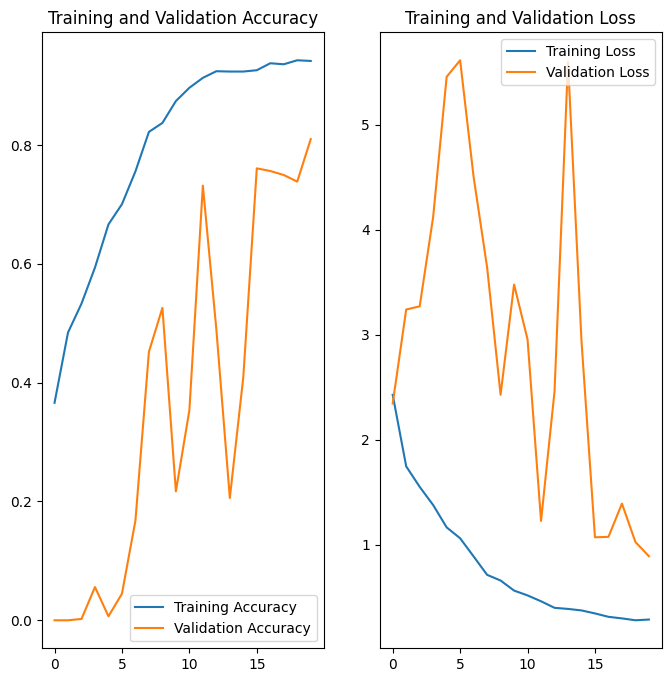

In [28]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Observations**

1.   Model-2 is still overfit.
2.   But there is increase in Train and Validation Accuracy as compared to previous Model-1.
3.   Train Accuracy to 94% and Val Accuracy 80%. Increase in validation accuracy seen.
4.   Decrease in difference between train and val accuracy seen.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

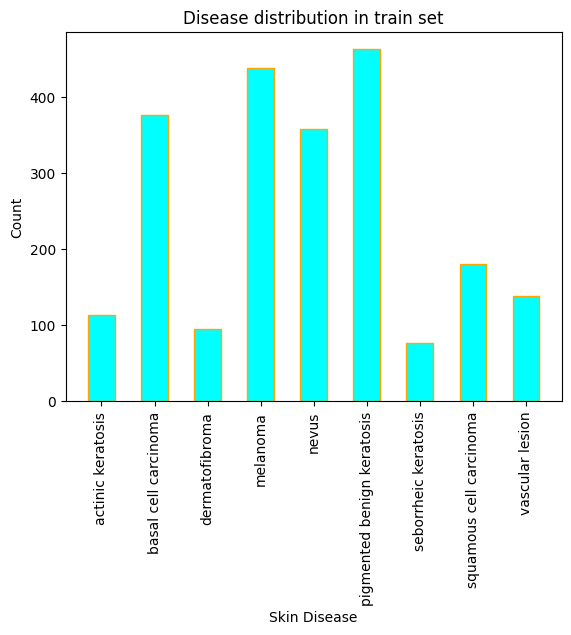

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [29]:
## Your code goes here.
import glob
from pathlib import Path

# Path to the training dataset (top-level directory containing class subdirectories)

# Get class names (subdirectory names in the train_dir)
class_names = os.listdir(data_dir_train)

# Initialize an empty dictionary to store class counts
class_counts = {}

# Count the number of images in each class folder
for class_name in class_names:
    fpath = Path(str(data_dir_train) + "/" + class_name)
    class_counts[class_name] = (len(list(fpath.rglob("*.jpg"))))
#print(class_counts)

s = pd.Series(class_counts)
df = pd.DataFrame(s)
df.reset_index(inplace=True)
df.columns = ["Skin Disease","Count"]

plt.bar(df['Skin Disease'],df['Count'],width=0.5,align='center',edgecolor='orange',color='cyan',)
plt.title("Disease distribution in train set")
plt.xlabel("Skin Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

print(class_names)

#### **Uneven distribution of classes seen in the model.**

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
       'Seborrheic Keratosis' as least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
       'pigmented benign keratosis' and 'melanoma' dominate in terms of highest sample count.  

       


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [52]:
path_to_training_dataset=data_dir_train
import shutil

import Augmentor
for i in class_names:
    fpath = Path(str(data_dir_train) + "/" + i)
    if os.path.exists(Path(str(fpath) + "/output")):
      output_dir=Path(str(fpath) + "/output")
      shutil.rmtree(output_dir)  # Remove the directory and its contents
    p = Augmentor.Pipeline(fpath)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)  # Rotate images randomly
    p.flip_left_right(probability=0.25)  # Flip images horizontally
    p.zoom_random(probability=0.25, percentage_area=0.8)  # Zoom randomly
    p.flip_top_bottom(probability=0.25)  # Flip images vertically
    p.random_contrast(probability=0.25, min_factor=0.7, max_factor=1.3)  # Adjust contrast
    p.random_color(probability=0.25, min_factor=0.7, max_factor=1.3)  # Adjust color saturation
    p.random_brightness(probability=0.25, min_factor=0.7, max_factor=1.3)  # Adjust brightness
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC9D3B3070>: 100%|██████████| 500/500 [00:38<00:00, 12.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCF059ADA0>: 100%|██████████| 500/500 [00:39<00:00, 12.79 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC9D3B3070>: 100%|██████████| 500/500 [00:38<00:00, 12.92 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDC7372A1A0>: 100%|██████████| 500/500 [03:14<00:00,  2.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2725x2082 at 0x7FDCF07B46D0>: 100%|██████████| 500/500 [03:15<00:00,  2.55 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC7C2D78B0>: 100%|██████████| 500/500 [00:38<00:00, 12.88 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDC99F52950>: 100%|██████████| 500/500 [01:28<00:00,  5.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCA6927130>: 100%|██████████| 500/500 [00:37<00:00, 13.28 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCF0672BC0>: 100%|██████████| 500/500 [00:40<00:00, 12.46 Samples/s]


### Lets see the distribution of augmented data after adding new images to the original training data.

{'actinic keratosis': 500, 'basal cell carcinoma': 500, 'dermatofibroma': 500, 'melanoma': 500, 'nevus': 500, 'pigmented benign keratosis': 500, 'seborrheic keratosis': 500, 'squamous cell carcinoma': 500, 'vascular lesion': 500}


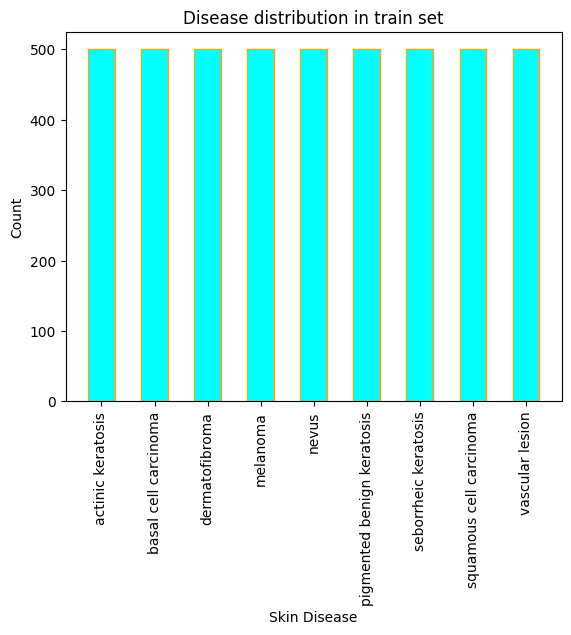

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [53]:
## Your code goes here.
import glob
from pathlib import Path

# Path to the training dataset (top-level directory containing class subdirectories)

# Get class names (subdirectory names in the train_dir)
class_names = os.listdir(data_dir_train)

# Initialize an empty dictionary to store class counts
class_counts = {}

# Count the number of images in each class folder
for class_name in class_names:
    fpath = Path(str(data_dir_train) + "/" + class_name + "/output")
    class_counts[class_name] = (len(list(fpath.rglob("*.jpg"))))
print(class_counts)

s = pd.Series(class_counts)
df = pd.DataFrame(s)
df.reset_index(inplace=True)
df.columns = ["Skin Disease","Count"]

plt.bar(df['Skin Disease'],df['Count'],width=0.5,align='center',edgecolor='orange',color='cyan',)
plt.title("Disease distribution in train set")
plt.xlabel("Skin Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

print(class_names)

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [54]:
#image_count_train = len(list(Path(data_dir_train).glob('*.jpg')))
for class_name in class_names:
  image_count_train=len(list(Path(str(data_dir_train) + "/" + class_name + "/output").glob('*.jpg')))
  print(class_name , " - " , image_count_train)

actinic keratosis  -  500
basal cell carcinoma  -  500
dermatofibroma  -  500
melanoma  -  500
nevus  -  500
pigmented benign keratosis  -  500
seborrheic keratosis  -  500
squamous cell carcinoma  -  500
vascular lesion  -  500


**Observations :**
- Augmentation has created 500 samples of each class type under output directory

In [55]:
import os
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(path_list_new))


4500


In [56]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(lesion_list_new))

4500


In [57]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [58]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = df.add(df2)
print(df2)

                                                   Path              Label
0     /content/drive/MyDrive/CNN_assignment/Skin can...  actinic keratosis
1     /content/drive/MyDrive/CNN_assignment/Skin can...  actinic keratosis
2     /content/drive/MyDrive/CNN_assignment/Skin can...  actinic keratosis
3     /content/drive/MyDrive/CNN_assignment/Skin can...  actinic keratosis
4     /content/drive/MyDrive/CNN_assignment/Skin can...  actinic keratosis
...                                                 ...                ...
4495  /content/drive/MyDrive/CNN_assignment/Skin can...    vascular lesion
4496  /content/drive/MyDrive/CNN_assignment/Skin can...    vascular lesion
4497  /content/drive/MyDrive/CNN_assignment/Skin can...    vascular lesion
4498  /content/drive/MyDrive/CNN_assignment/Skin can...    vascular lesion
4499  /content/drive/MyDrive/CNN_assignment/Skin can...    vascular lesion

[4500 rows x 2 columns]


In [59]:
df2['Label'].value_counts()

,count
Label,
actinic keratosis,500
basal cell carcinoma,500
dermatofibroma,500
melanoma,500
nevus,500
pigmented benign keratosis,500
seborrheic keratosis,500
squamous cell carcinoma,500
vascular lesion,500


##### **So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.** #####

#### **Todo**: Train the model on the data created using Augmentor

In [60]:
batch_size = 32
img_height = 180
img_width = 180
data_dir_train_new=Path(str(data_dir_train) + "/*" + "/output").glob('*.jpg')
print(data_dir_train_new)




<generator object Path.glob at 0x7fdc7c1697e0>


In [61]:
srcdir = data_dir_train
destdir = pathlib.Path(r"/content/drive/MyDrive/AugmentSample/Train")
#file_path = os.path.join(root_dir, folder, subfolder, filename)
if os.path.exists(destdir):
  shutil.rmtree(destdir)


for i in class_names:
  sourcepath =  Path(str(data_dir_train) + "/" + i + "/output/").glob("*.jpg")
  destpath = Path(str(destdir) + "/" + i)
  if not os.path.exists(destpath):
    os.makedirs(destpath)
  for filename in sourcepath:
    shutil.copy(filename, destpath)
    if os.path.exists(filename):
      os.remove(filename)
  print(sourcepath)
  print(destpath)

<generator object Path.glob at 0x7fdc7c1698c0>
/content/drive/MyDrive/AugmentSample/Train/actinic keratosis
<generator object Path.glob at 0x7fdc7c16a650>
/content/drive/MyDrive/AugmentSample/Train/basal cell carcinoma
<generator object Path.glob at 0x7fdc7c1692a0>
/content/drive/MyDrive/AugmentSample/Train/dermatofibroma
<generator object Path.glob at 0x7fdc7c16a3b0>
/content/drive/MyDrive/AugmentSample/Train/melanoma
<generator object Path.glob at 0x7fdc7c169bd0>
/content/drive/MyDrive/AugmentSample/Train/nevus
<generator object Path.glob at 0x7fdc7c16a490>
/content/drive/MyDrive/AugmentSample/Train/pigmented benign keratosis
<generator object Path.glob at 0x7fdc7c1692a0>
/content/drive/MyDrive/AugmentSample/Train/seborrheic keratosis
<generator object Path.glob at 0x7fdc7c169fc0>
/content/drive/MyDrive/AugmentSample/Train/squamous cell carcinoma
<generator object Path.glob at 0x7fdc7c169bd0>
/content/drive/MyDrive/AugmentSample/Train/vascular lesion


#### **Todo:** Create a training dataset

In [62]:
data_dir_train_new = destdir
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=15)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=15)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [65]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model3 = models.Sequential()
model3.add(Rescaling(1./255, input_shape=(180, 180, 3))),  # Rescaling in the model

model3.add(Conv2D(128, (3,3),input_shape=(180,180,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(64, (3,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.1))


model3.add(Conv2D(32, (3,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(16, (3,3),activation='relu',kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dense(9,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [66]:
## your code goes here
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
)
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 180, 180, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 180, 180, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 90, 90, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 90, 90, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 90, 90, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 45, 45, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 45, 45, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 20, 20, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,609 (1.95 MB)

 Trainable params: 511,161 (1.95 MB)

 Non-trainable params: 448 (1.75 KB)

#### **Todo:**  Train your model

In [67]:
epochs = 20
## Your code goes here, use 50 epochs.
history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=15
)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - Accuracy: 0.2381 - loss: 2.3253 - val_Accuracy: 0.0756 - val_loss: 2.8798
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - Accuracy: 0.3466 - loss: 1.8331 - val_Accuracy: 0.1922 - val_loss: 2.1285
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - Accuracy: 0.4114 - loss: 1.7178 - val_Accuracy: 0.5278 - val_loss: 1.4827
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - Accuracy: 0.4522 - loss: 1.5635 - val_Accuracy: 0.6078 - val_loss: 1.2579
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - Accuracy: 0.4673 - loss: 1.5185 - val_Accuracy: 0.6656 - val_loss: 1.0663
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - Accuracy: 0.5220 - loss: 1.3633 - val_Accuracy: 0.4122 - val_loss: 2.5033
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - Accuracy: 0.5704 - loss: 1.2589 - val_Accuracy: 0.4833 - val_loss: 3.2049
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - Accuracy: 0.6028 - loss: 1.1516 - 

#### **Todo:**  Visualize the model results

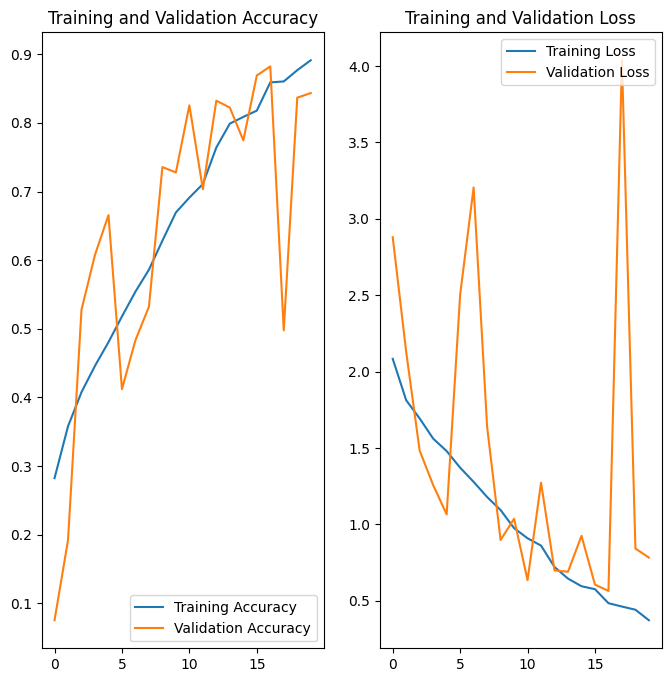

In [68]:
acc = history3.history['Accuracy']
val_acc = history3.history['val_Accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### **Save Model** #####

In [69]:

model3.save('CNN_Skin.h5')  # Save as model.h5
loaded_model = tf.keras.models.load_model('CNN_Skin.h5')  # or 'model.h5'



#####**Evaluate *italicized text* Model**#####

- Predicted Classes for dataset, with SHuffle = False.
- Printing Overall Accuracy




In [70]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=15
)


predictions = loaded_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

Found 118 files belonging to 9 classes.


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step
[3 4 2 0 5 1 3 2 0 0 2 0 4 3 0 0 7 1 7 5 3 1 5 3 1 1 7 1 0 3 1 1 6 6 0 5 4
 4 4 3 2 2 2 2 1 7 7 5 4 1 4 4 4 3 5 3 4 5 4 4 4 3 4 3 4 4 4 3 5 4 4 4 3 4
 5 4 4 4 3 4 7 5 2 5 2 2 4 2 0 2 4 5 1 2 4 5 6 3 1 4 8 4 6 4 3 7 7 0 7 1 1
 7 7 6 2 8 1 8]


In [71]:
import numpy as np

# Create empty lists to store predictions and actual labels
predictions = []
actual_labels = []

# Iterate over the test dataset
for images, labels in test_ds:
    # Get model predictions (probabilities or logits)
    preds = loaded_model.predict(images)

    # Convert predictions to class labels (argmax to get the class with the highest probability)
    predicted_classes = np.argmax(preds, axis=1)

    # Store the actual labels and predicted classes
    actual_labels.extend(labels.numpy())  # Actual labels (from dataset)
    predictions.extend(predicted_classes)  # Predicted class labels

# Convert lists to numpy arrays for easier processing
actual_labels = np.array(actual_labels)
predictions = np.array(predictions)

# Calculate accuracy: the percentage of correct predictions
accuracy = np.mean(predictions == actual_labels) * 100

# Print the overall accuracy
print(f"Overall Accuracy: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Overall Accuracy: 37.29%


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
Yes, Model accuracy increase and reduced overfitting.


##### **Final Observations:**
#### Numbers of Base Model with Batch Normalization,Drop and Regularization Rescaling:
 - Rescaling
 - Batch Normalization
 - Dropout - 0.15
 - Training Accuracy = 94%, Validation Accuracy = 46%
 - epochs = 20
 - L2 = 0.01
 - Batch_size = 32

#### Adding Rebalancing Dataset for base model with keras improved performance as below:
 - Rescaling
 - Data Augmentation using keras library
 - Dropout - 0.15
 - Batch Normalization
 - epochs = 20
 - L2 = 0.01
 - Training Accuracy = 94%, Validation Accuracy = 80%


#### Using Augmentor library resulted in better Accuracy with model.
 - Rescaling
 - DataAugmenter using Augmentor library.
 - Dropout 0.1
 - Batch Normalization
 - L2 = 0.01
 - epochs = 20
 - batch_size = 15
 - Addition addition layer.
 - Training Accuracy = 89%, Validation Accuracy = 84%
 - Model Looks good

##### Testing accuracy - 37.29%**  








